Failed to download (trying next):
<urlopen error [Errno 113] No route to host>



100%|██████████| 9912422/9912422 [00:03<00:00, 2550752.90it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
<urlopen error [Errno 113] No route to host>



100%|██████████| 28881/28881 [00:00<00:00, 81024.67it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
<urlopen error [Errno 113] No route to host>



100%|██████████| 1648877/1648877 [00:01<00:00, 1488700.02it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
<urlopen error [Errno 113] No route to host>



100%|██████████| 4542/4542 [00:00<00:00, 1245865.46it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



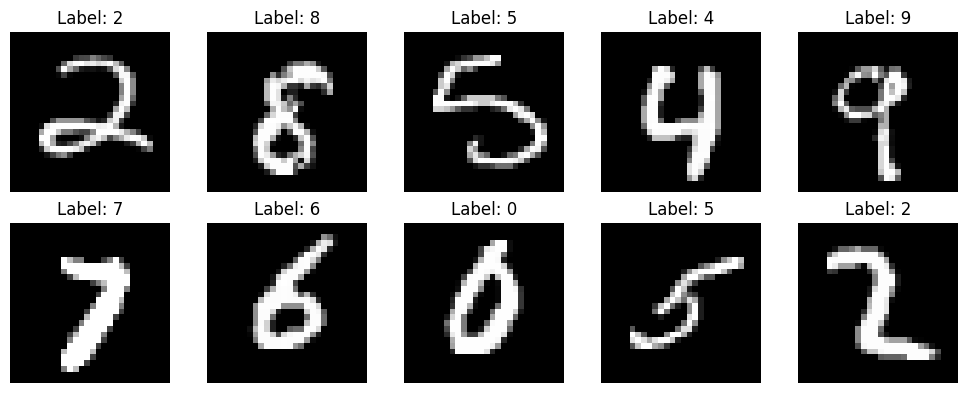

SimpleNN(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)
Using device: cpu
Epoch [1/5], Step [100/938], Loss: 1.0701
Epoch [1/5], Step [200/938], Loss: 0.3700
Epoch [1/5], Step [300/938], Loss: 0.3198
Epoch [1/5], Step [400/938], Loss: 0.2758
Epoch [1/5], Step [500/938], Loss: 0.2179
Epoch [1/5], Step [600/938], Loss: 0.2073
Epoch [1/5], Step [700/938], Loss: 0.1931
Epoch [1/5], Step [800/938], Loss: 0.1727
Epoch [1/5], Step [900/938], Loss: 0.1633
Epoch [2/5], Step [100/938], Loss: 0.1273
Epoch [2/5], Step [200/938], Loss: 0.1289
Epoch [2/5], Step [300/938], Loss: 0.1205
Epoch [2/5], Step [400/938], Loss: 0.1175
Epoch [2/5], Step [500/938], Loss: 0.1223
Epoch [2/5], Step [600/938], Loss: 0.1119
Epoch [2/5], Step [700/938], Loss: 0.1158
Epoch [2/5], Step [800/938], Loss: 0.1046
Epoch [2/5

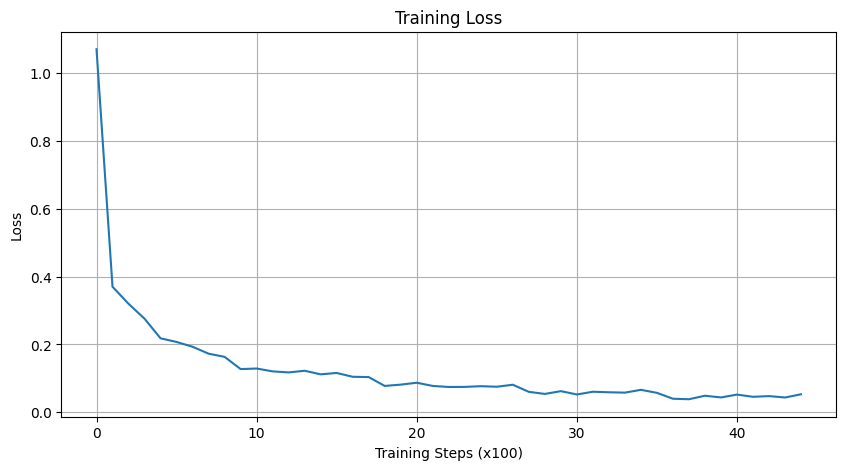

In [2]:
# used tutorial: https://pythonguides.com/pytorch-mnist/

### Method 1 – Set Up Your Environment
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np

### Method 2 – Load and Prepare the MNIST Dataset

# Define transformations for the images
transform = transforms.Compose([
    transforms.ToTensor(),  # Convert images to PyTorch tensors
    transforms.Normalize((0.1307,), (0.3081,))  # Normalize with MNIST mean and std
])

# Load the training dataset
train_dataset = torchvision.datasets.MNIST(
    root='./data',  # Where to store the dataset
    train=True,     # This is training data
    download=True,  # Download if not present
    transform=transform  # Apply transformations
)

# Load the test dataset
test_dataset = torchvision.datasets.MNIST(
    root='./data',
    train=False,
    download=True,
    transform=transform
)

# Create data loaders for batch processing
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)



# Function to display images
def show_images(images, labels):
    fig, axes = plt.subplots(2, 5, figsize=(10, 4))
    axes = axes.flatten()

    for i in range(10):
        axes[i].imshow(images[i].reshape(28, 28), cmap='gray')
        axes[i].set_title(f"Label: {labels[i]}")
        axes[i].axis('off')

    plt.tight_layout()
    plt.show()

# Get some random training images
dataiter = iter(train_loader)
images, labels = next(dataiter)

# Show images
show_images(images[:10], labels[:10])

### Method 3 – Create a Neural Network Model

class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(28*28, 128)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)
        return x

# Initialize the model
model = SimpleNN()
print(model)

### Method 4 – Train the Neural Network
# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

# Check if GPU is available
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")
model.to(device)

# Training loop
num_epochs = 5
train_losses = []

for epoch in range(num_epochs):
    running_loss = 0.0

    for i, (inputs, labels) in enumerate(train_loader):
        # Move tensors to the configured device
        inputs, labels = inputs.to(device), labels.to(device)

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        # Backward pass and optimize
        loss.backward()
        optimizer.step()

        # Print statistics
        running_loss += loss.item()
        if (i+1) % 100 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{len(train_loader)}], Loss: {running_loss/100:.4f}')
            train_losses.append(running_loss/100)
            running_loss = 0.0

print('Training finished!')

plt.figure(figsize=(10, 5))
plt.plot(train_losses)
plt.title('Training Loss')
plt.xlabel('Training Steps (x100)')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

In [4]:
### Method 5 – Evaluate the Model

# Evaluate the model

model.eval()
correct = 0
total = 0

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f'Accuracy on the test set: {accuracy:.2f}%')


# Function to show predictions
def show_predictions(images, labels, preds):
    fig, axes = plt.subplots(2, 5, figsize=(10, 4))
    axes = axes.flatten()

    for i in range(10):
        axes[i].imshow(images[i].cpu().reshape(28, 28), cmap='gray')
        color = 'green' if preds[i] == labels[i] else 'red'
        axes[i].set_title(f"Pred: {preds[i]}, True: {labels[i]}", color=color)
        axes[i].axis('off')

    plt.tight_layout()
    plt.show()

# Get predictions for some test images
dataiter = iter(test_loader)
images, labels = next(dataiter)
images, labels = images.to(device), labels.to(device)

outputs = model(images)
_, preds = torch.max(outputs, 1)

# Show predictions
show_predictions(images[:10], labels[:10], preds[:10])

NameError: name 'model' is not defined

In [4]:
### Method 6 – Save and Load Your Model

# Save the model
torch.save(model.state_dict(), 'mnist_model.pth')
print("Model saved!")

# Load the model (for future use)
loaded_model = SimpleNN()
loaded_model.load_state_dict(torch.load('mnist_model.pth'))
loaded_model.to(device)
loaded_model.eval()
print("Model loaded!")

Model saved!
Model loaded!
